## Simulating LSST-like image time-series of lensed type Ia supernovae

### Import python libraries, LSST characteristics and functions

In [1]:
import pickle as pickle
from class_telescope import Telescope
from image_time_series import simulate_time_series_images
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.rc("font", family="serif")
plt.rc("text", usetex=True)

### Parameter distributions 

Sample $z_l$, $z_s$ and $\theta_E$ from MC sample from Wojtak et al. (2019).


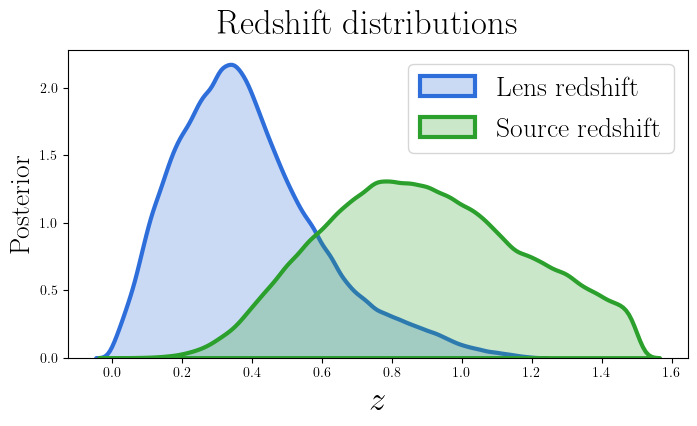

In [2]:
# ---------------------------------
telescope = 'LSST'
bandpasses = ['r', 'i', 'z', 'y']
# ---------------------------------

lsst = Telescope(telescope, bandpasses)

lsst.plot_redshifts()


### Seeing distributions
Sample the PSF from the predicted seeing distribution for the <b> baseline v2.0 </b> observing strategy for 10 years.

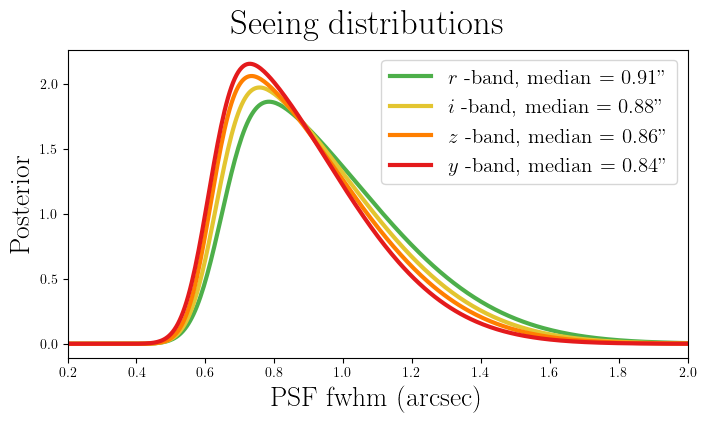

In [3]:
lsst.plot_seeing_distributions()


### Cadence

Sample the cadence from the predicted distribution for the <b> baseline v2.0 </b> observing strategy for the LSST Wide, Fast, Deep survey from Catarina Alves' simulations.


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 64/64 [00:00<00:00, 329.02it/s]


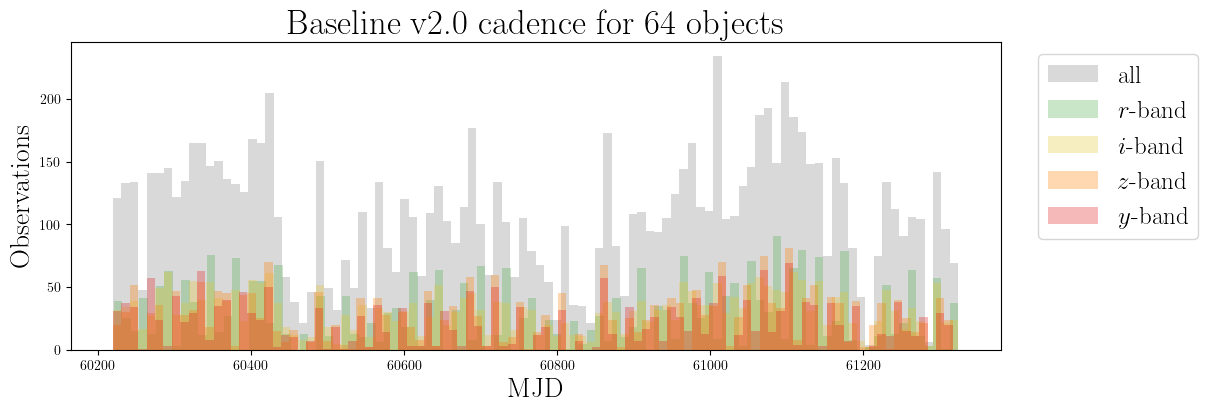

In [4]:
lsst.plot_cadence()


### Generation of training and test sets


  0%|                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

Theoretically visible with image multiplicity method?            True
Theoretically visible with magnification method?                 False
Observations allow for detection with image multiplicity method? True
Observations allow for detection with magnification method?      True
 
Lens redshift:  0.49
Supernova redshift:  1.28
Einstein radius:  0.5
Time delays:  [ 0.   13.15] days
Macro magnification:  [4.09 3.64]
Microlensing contribution at peak (magnitudes):  0.0
Hubble constant:  67.8
Time-delay distance:  3602.15
Peak brightness images for r,i,z,y bands:
[[24.71 24.88]
 [23.37 23.4 ]
 [22.91 23.12]
 [22.72 22.76]]
 


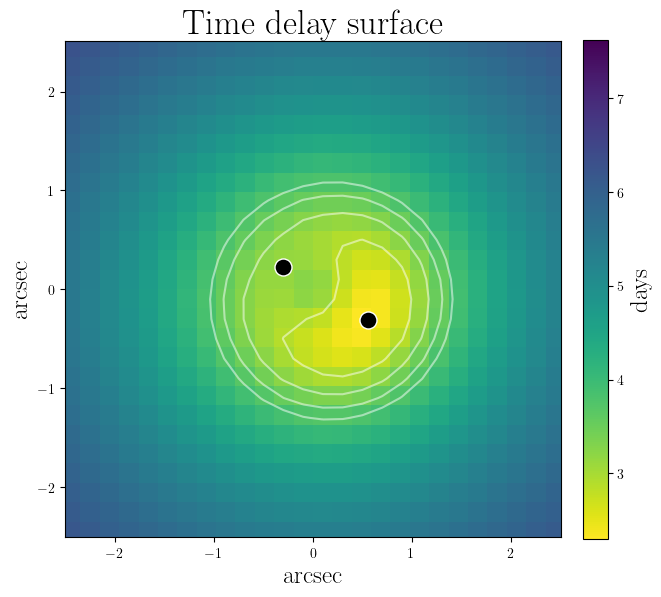

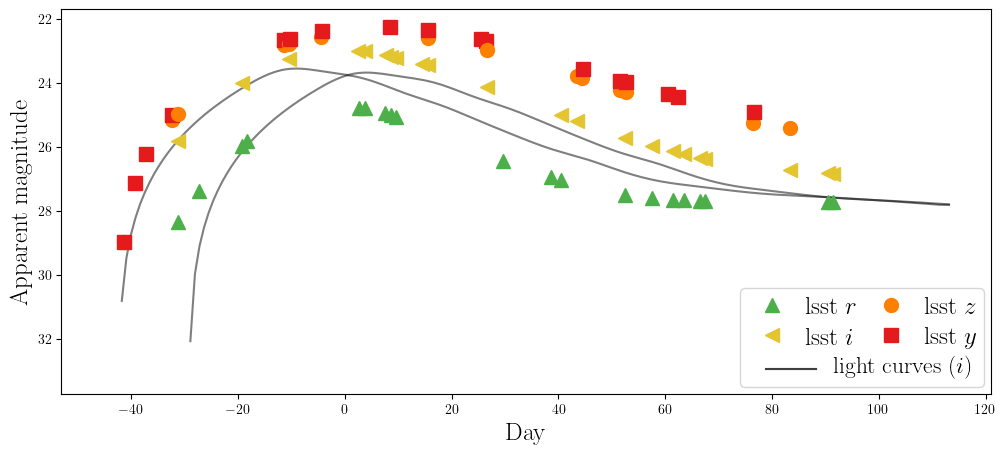

37.809903299639814 24
34.18330656481575 22.55600398369109
32.83054008512653 22.09553870215837
32.77292923670849 21.872331643548943


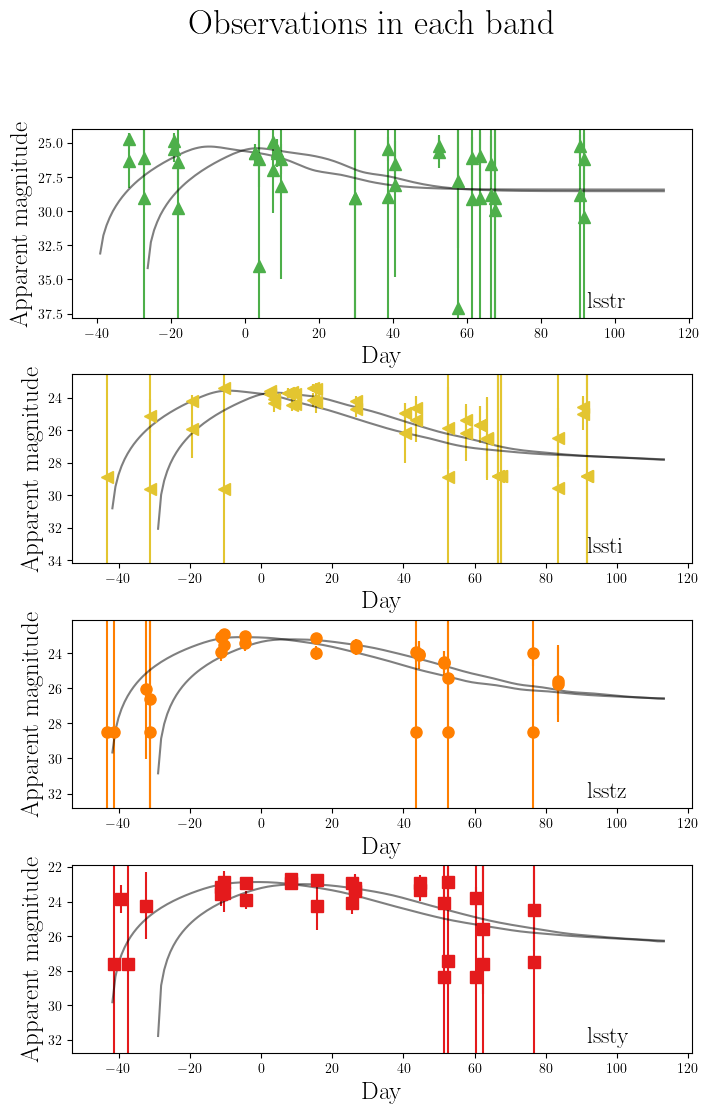

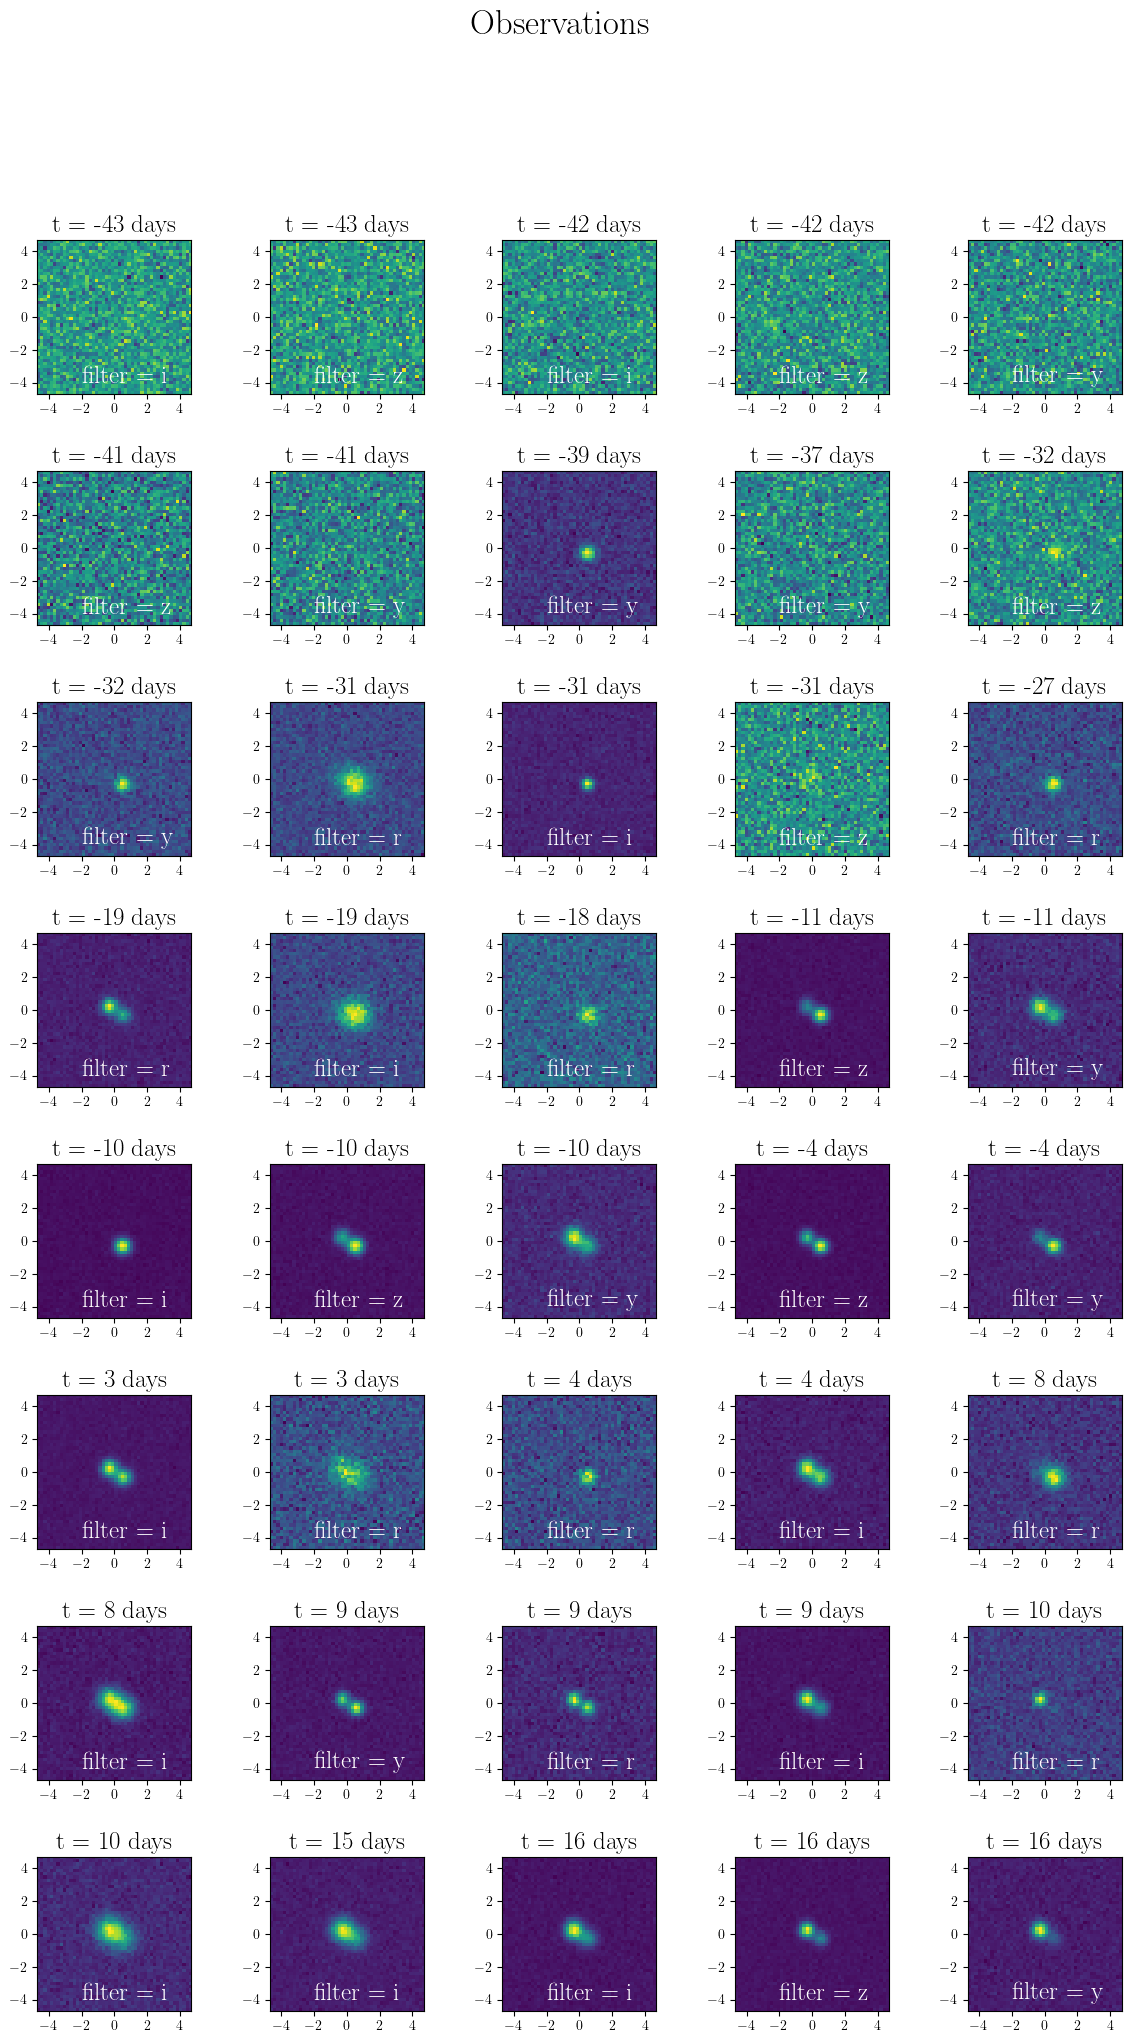

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:09<00:00,  9.10s/it]

Done!
Simulating images took  9.0 seconds ( 0.0 hours) to complete.
Number of image-time series generated:  1
Number of configurations tried:  1
Number of attempts:  85
 


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:10<00:00, 10.35s/it]

                                         time_series  z_source    z_lens  \
0  [[[0.4703238050265642, -0.2562498523885982, -1...   1.27863  0.487846   

     H0   theta_E                                           obs_peak  \
0  67.8  0.501325  [[24.710192020067883, 24.877860948356826], [23...   

                                           obs_times  \
0  [-43.30959612115112, -43.28579612114845, -42.2...   

                                           obs_bands  \
0  [i, z, i, z, y, z, y, y, y, z, y, r, i, z, r, ...   

                                             obs_mag  \
0  [[28.850000381469727, inf], [28.5, inf], [inf,...   

                                       obs_mag_error  ...  obs_start  \
0  [[29.30952874530254, nan], [36.231387426742806...  ...  60861.263   

      obs_end  mult_method_peak  mult_method mag_method_peak  mag_method  \
0  60996.0304              True         True           False        True   

                    coords                                      o

In [5]:
num_samples = 1               # Total number of lens systems to be generated  
batch_size = 1                # Number of lens systems that is saved together in a batch
batch = 1                     # Starting number of the batch
num_images = 2                # Choose between 2 (for doubles) and 4 (for quads)
obs_upper_limit = 100         # Upper limit of number of observations
obs_lower_limit = 5           # Lower limit of number of observations
fixed_H0 = True               # Bool, if False: vary H0. if True: fix H0 to 70 km/s/Mpc (for the evaluation set)
add_microlensing = False      # Bool, if False: Only macro magnification. if True: Add effects of microlensing

Show = True                   # Bool, if True: Show figures and print information about the lens systems
Save = False                  # Bool, if True: Save image time-series
path = "../processed_data/Baseline_v_2_0_/" # Path to folder in which to save the results


df = simulate_time_series_images(batch_size, batch,  num_samples, num_images, add_microlensing, 
                                 obs_lower_limit, obs_upper_limit, fixed_H0, lsst, Show, Save, path)

# obs_times, obs_filters, obs_all, obs_skysig, obs_zeropoint, ra, dec, MW_BV, z_source_list_, 
# z_lens_list_, theta_E_list_, telescope, bandpasses

# Make plot per band with light curves
# Make correlatation plots (from last meeting)
# Write down questions
# Count how many have obs_mag +/- obs_mag_error X sigma above lim_mag?

[[24.71019202 24.87786095]
 [23.36841734 23.4026986 ]
 [22.90631208 23.11674559]
 [22.72057589 22.75909203]]
78 78
[-43.30959612 -43.28579612 -42.24029612 -42.19989612 -42.17599612
 -41.32049612 -41.29629612 -39.31299612 -37.26849612 -32.32029612
 -32.29609612 -31.35079612 -31.28129612 -31.24739612 -27.33499612
 -19.34449612 -19.34439612 -18.28729612 -11.35329612 -11.32889612
 -10.40669612 -10.37999612 -10.34989612  -4.40639612  -4.36009612
   2.54210388   2.55130388   3.68360388   3.70800388   7.60040388
   7.62470388   8.53380388   8.55140388   8.57520388   9.55710388
   9.58180388  14.53300388  15.51550388  15.55050388  15.58550388
  25.53000388  26.46360388  26.54070388  26.61790388  29.54930388
  38.60170388  40.44600388  40.46350388  43.44780388  43.47180388
  44.48370388  44.50790388  51.49210388  51.51630388  52.48810388
  52.51280388  52.57310388  52.59700388  57.48750388  57.51150388
  60.43280388  61.42130388  61.43260388  62.46380388  63.42870388
  63.44000388  66.42690388 

(28.0, 20.0)

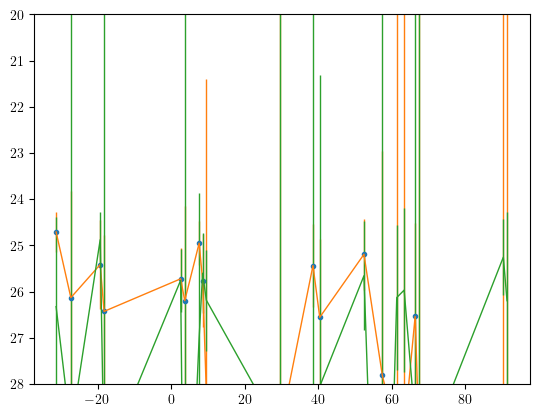

In [10]:
print(df['obs_peak'][0])

print(len(df['obs_times'][0]), len(df['obs_mag'][0]))
print(np.array(df['obs_times'][0]))
indices = np.array(df['obs_bands'][0]) == 'r'

print(df['obs_mag_error'][0])


for i in range(len(df['obs_times'][0])):
    print(df['obs_bands'][0][i], df['obs_mag'][0][i])

plt.figure()
plt.plot(np.array(df['obs_times'][0])[indices], np.array(df['obs_mag'][0])[:,0][indices], '.')
plt.errorbar(np.array(df['obs_times'][0])[indices], np.array(df['obs_mag'][0])[:,0][indices], 
             yerr=np.array(df['obs_mag_error'][0])[:,0][indices], lw=1)
plt.errorbar(np.array(df['obs_times'][0])[indices], np.array(df['obs_mag'][0])[:,1][indices], 
             yerr=np.array(df['obs_mag_error'][0])[:,1][indices], lw=1)

plt.ylim(28, 20)

### Calculate limiting magnitude including weather effects

In [7]:
import sncosmo

index = 8
zeropoint = df['zeropoint'][index]
skysig = np.array(df['skysig'][index])
mag_im = df['brightness_im'][index]
mag_im = mag_im[:len(zeropoint)]
bands = np.array(df['obs_bands'][index])

ab = sncosmo.get_magsystem('ab')
zpfluxes = np.array([ab.zpbandflux('lsst' + b) for b in bands])

print(bands)


KeyError: 'zeropoint'

In [ ]:
# Calculate limiting magnitude from sky noise and zeropoint
m_lim = zeropoint - 2.5*np.log10(5 * np.array(skysig))
print("Limiting magnitudes: ")
print(m_lim)

In [ ]:
# Convert image magnitudes back into fluxes
# flux_im = 10**(mag_im / -2.5) * zpfluxes

print(skysig[bands == 'r'])
print(skysig[bands == 'i'])
print(skysig[bands == 'z'])
print(skysig[bands == 'y'])

### Retrieve light curve observations

In [ ]:
print(min(df['brightness_unresolved'][0]))


times = np.array(df['obs_times'][0])
bands = np.array(df['obs_bands'][0])
mags = df['brightness_im'][0]
mags_unresolved = df['brightness_unresolved'][0]

print(times[-1] - times[0])
print(df['obs_end'][0] - df['obs_start'][0])
print(len(times))

mask_r = np.where(bands == 'r')
mask_i = np.where(bands == 'i')
mask_z = np.where(bands == 'z')
mask_y = np.where(bands == 'y')

print(df['brightness_im'][0][:,1][mask_y])

plt.figure()
plt.plot(times[mask_r], mags[:,0][mask_r], color='C0', label="r")
plt.plot(times[mask_r], mags[:,1][mask_r], color='C0')

plt.plot(times[mask_i], mags[:,0][mask_i], color='C1', label="i")
plt.plot(times[mask_i], mags[:,1][mask_i], color='C1')
plt.plot(times[mask_i], mags_unresolved[mask_i], '.', color='black')

plt.plot(times[mask_z], mags[:,0][mask_z], color='C2', label="z")
plt.plot(times[mask_z], mags[:,1][mask_z], color='C2')

plt.plot(times[mask_y], mags[:,0][mask_y], color='C3', label="y")
plt.plot(times[mask_y], mags[:,1][mask_y], color='C3')

plt.ylim(31, 22)
plt.ylabel("Apparent magnitude")
plt.xlabel("Time (days)")
plt.legend()


In [ ]:

"""
averages = [np.mean(t) for t in timings]
print(averages)
sums = [np.sum(t) for t in timings]
periods = [1,2,3,4,5,6,7,8,9,10,11]

plt.figure(1, figsize=(15, 5))
plt.plot(periods, averages[:11], '.', ms=10, color='midnightblue')

plt.figure(2, figsize=(15, 5))
plt.plot(periods, sums[:11], '.', ms=10, color='midnightblue')
"""

In [ ]:
"""
plt.figure(3)
plt.plot([1,2], sums[11:], '.', ms=20, color="C3")
print(sums[11], sums[12])
print(averages[11], averages[12])
print(averages[6])
"""

In [ ]:
# timings_200 = timings.copy()

In [ ]:
"""
mmaverages = [np.mean(t) for t in mmtimings]
mmsums = [np.sum(t) for t in mmtimings]
mmperiods = [1,2,3,4,5,6,7]
print(mmaverages)
print(mmsums)

plt.figure(4, figsize=(15, 5))
plt.plot(mmperiods, mmaverages, '.', ms=10, color='C1')

plt.figure(5, figsize=(15, 5))
plt.plot(mmperiods, mmsums, '.', ms=10, color='C1')
"""